In [1]:
import numpy as np
from astropy.table import Table, vstack
import healpy as hp
import sys
import os
import time
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
import pandas as pd

In [2]:
mb_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_associations_w_mag.fits'
raw_mb_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_associations_noBuffer.fits'
neighbours_path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/CosmoDC2/cosmodc2_neighbours.fits'
healpath = '/sps/lsst/users/tguillem/web/clusters/catalogs/cosmoDC2_photoz_flexzboost/v1/'
inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_detections_refined_noBuffer.txt'
# = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/small/amico_map_associations/all_maps.fits'

In [3]:
cl_cat = pd.read_csv(inpath, sep="\t", header = 243)
cl_cat = Table.from_pandas(cl_cat)

In [4]:
mb = Table.read(mb_inpath)

In [5]:
mb[0]

GALID,FIELD_PROB,ASSOC_ID,ASSOC_PROB,ra,dec,redshift,mag_g,mag_i,mag_r,mag_z,mag_y
int64,float32,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64
6062500004,0.5248012,2469,0.4751988,63.551468433602096,-34.44898847937647,0.02070520114046359,18.6130428314209,17.90467071533203,18.14947509765625,17.777801513671875,17.697961807250977


In [6]:
cl_cat[0]

# ID,Xpix,Ypix,Zpix,Xphys,Yphys,Zphys,SN,SN_NO_CLUSTER,AMP,RICH,LIKE,MSKFRC,POISS,LAMB,LAMBSTAR,ZPIX_SIGM,ZPIX_SIGP,ZPHYS_SIGM,ZPHYS_SIGP,ODDS,Pz-0,Pz-1,Pz-2,Pz-3,Pz-4,Pz-5,Pz-6,Pz-7,Pz-8,Pz-9,Pz-10,Pz-11,Pz-12,Pz-13,Pz-14,Pz-15,Pz-16,Pz-17,Pz-18,Pz-19,Pz-20,Pz-21,Pz-22,Pz-23,Pz-24,Pz-25,Pz-26,Pz-27,Pz-28,Pz-29,Pz-30,Pz-31,Pz-32,Pz-33,Pz-34,Pz-35,Pz-36,Pz-37,Pz-38,Pz-39,Pz-40,Pz-41,Pz-42,Pz-43,Pz-44,Pz-45,Pz-46,Pz-47,Pz-48,Pz-49,Pz-50,Pz-51,Pz-52,Pz-53,Pz-54,Pz-55,Pz-56,Pz-57,Pz-58,Pz-59,Pz-60,Pz-61,Pz-62,Pz-63,Pz-64,Pz-65,Pz-66,Pz-67,Pz-68,Pz-69,Pz-70,Pz-71,Pz-72,Pz-73,Pz-74,Pz-75,Pz-76,Pz-77,Pz-78,Pz-79,Pz-80,Pz-81,Pz-82,Pz-83,Pz-84,Pz-85,Pz-86,Pz-87,Pz-88,Pz-89,Pz-90,Pz-91,Pz-92,Pz-93,Pz-94,Pz-95,Pz-96,Pz-97,Pz-98,Pz-99,Pz-100,Pz-101,Pz-102,Pz-103,Pz-104,Pz-105,Pz-106,Pz-107,Pz-108,Pz-109,Pz-110,Pz-111,Pz-112,Pz-113,Pz-114,Pz-115,Pz-116,Pz-117,Pz-118,Pz-119,Pz-120,Pz-121,Pz-122,Pz-123,Pz-124,Pz-125,Pz-126,Pz-127,Pz-128,Pz-129,Pz-130,Pz-131,Pz-132,Pz-133,Pz-134,Pz-135,Pz-136,Pz-137,Pz-138,Pz-139,Pz-140,Pz-141,Pz-142,Pz-143,Pz-144,Pz-145,Pz-146,Pz-147,Pz-148,Pz-149,Pz-150,Pz-151,Pz-152,Pz-153,Pz-154,Pz-155,Pz-156,Pz-157,Pz-158,Pz-159,Pz-160,Pz-161,Pz-162,Pz-163,Pz-164,Pz-165,Pz-166,Pz-167,Pz-168,Pz-169,Pz-170,Pz-171,Pz-172,Pz-173,Pz-174,Pz-175,Pz-176,Pz-177,Pz-178,Pz-179,Pz-180,Pz-181,Pz-182,Pz-183,Pz-184,Pz-185,Pz-186,Pz-187,Pz-188,Pz-189,Pz-190,Pz-191,Pz-192,Pz-193,Pz-194,Pz-195,Pz-196,Pz-197,Pz-198,Pz-199,Pz-200,Pz-201,Pz-202,Pz-203,Pz-204,Pz-205,Pz-206,Pz-207,Pz-208,Pz-209,Pz-210,Pz-211,Pz-212,Pz-213,Pz-214,Pz-215,Pz-216,Pz-217,Pz-218,Unnamed: 240
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,183,237,55,64.137535,-34.692315,0.57,7.9325892,63.604311,3.9973116,264.38139,4045.5084,0.0063522684,1.0,218.22561,87.619512,0.23372335,0.18266881,0.0023372335,0.0018266881,0.99176713,0.0,0.0,0.0,0.0,0.0,0.0,1.3676317e-08,1.333178e-07,4.0682476e-07,1.0130902e-06,4.4854849e-06,1.364639e-05,2.4261548e-05,3.9942246e-05,5.9441121e-05,8.0013338e-05,0.00010644065,0.00012931043,0.00015236107,0.00019734499,0.00024242764,0.00030253948,0.00035609159,0.00039049013,0.00041799572,0.00049818183,0.0005879458,0

In [7]:
cl_cat['lambest'] = 0.0
cl_cat['lambest_norn'] = 0.0

In [8]:
rich = []
start = time.time()
for i, id in enumerate(cl_cat['# ID']):
    if i%1000==0:
        end = time.time()
        print(end-start, i)
    cl_cat['lambest'][cl_cat['# ID'] == id] = sum(mb[mb['ASSOC_ID']==id]['ASSOC_PROB'])
    cl_cat['lambest_norn'][cl_cat['# ID'] == id] = cl_cat['lambest'][cl_cat['# ID']==id]/(1-cl_cat[cl_cat['# ID']==id]['MSKFRC'][0])

0.0002925395965576172 0
25.348323106765747 1000
50.654128551483154 2000
77.01976871490479 3000


In [9]:
cl_cat[:3]['LAMB', 'lambest', 'lambest_norn']

LAMB,lambest,lambest_norn
float64,float64,float64
218.22561,216.8393793827854,218.22560701026757
267.218,265.8990012560971,267.2180008252665
182.0195,181.04321338562295,182.01949901335692


In [10]:
#cl_cat["lambest_norn"] = [round(cl_cat["lambest_norn"][i], 6) for i in range(len(cl_cat["lambest_norn"]))]

Text(0.5, 0, '$\\lambda$')

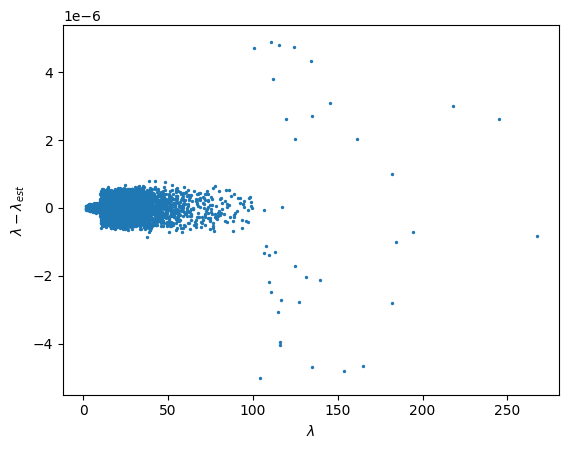

In [11]:
plt.scatter(cl_cat["LAMB"], cl_cat["LAMB"]-cl_cat["lambest_norn"], s = 2, alpha = 1)
plt.ylabel("$\lambda-\lambda_{est}$")
plt.xlabel("$\lambda$")

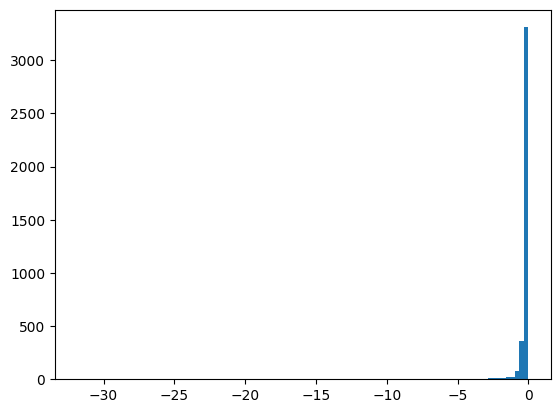

In [12]:
plt.hist(cl_cat["lambest"]-cl_cat["LAMB"], bins = 100)
plt.show()